# Inferential statistics
## Part II - Exploratory Data Analysis

Before starting the actual analysis it's a good idea to explore the data that we will be using, to give yourself a first idea of the questions you will be able to answer with your data, the bias you could have, other data you could need, etc.

### Libraries
In addition to pandas we will also import matplolib and seaborn so that we will able to plot our data to better understand it.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_columns', 100)

### Explore the dataset

Let's load the cleaned dataset first. Import it with the name `wnba` and show the head.

In [10]:
wnba = pd.read_csv(r"C:\Users\HP\Documents\IronHack\Bootcamp\IronHackLessons\Week5\LAB Hypothesis Testing mini-project\data\wnba_clean2.csv")
wnba.head()

,Unnamed: 0,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,0,Aerial Powers,DAL,F,183,71,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,1,Alana Beard,LA,G/F,185,73,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,2,Alex Bentley,CON,G,170,69,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,3,Alex Montgomery,SAN,G/F,185,84,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,4,Alexis Jones,MIN,G,175,78,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0


**Use describe() to take an initial look at the data.**

In [13]:
wnba.describe()
wnba.drop("Unnamed: 0",axis=1,inplace=True)

Most of the game-related stats have a very high range of values which can be explained by the fact that the dataset contains data on both players that play the majority of games and also players that may spend almost the entirety of the season on the bench.

There are also some extremes in the weight and age columns. Feel free, if you'd like, to check which are the players with a very high (or low) age/weight and do some research on them. This is useful to confirm that they are simply outliers and not errors in the data.

In [17]:
display(wnba[wnba["Weight"]>=wnba["Weight"].quantile(0.75)])
display(wnba[wnba["Weight"]<=wnba["Weight"].quantile(0.25)])

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
12,Amanda Zahui B.,NY,C,196,113,29.414827,SE,"August 9, 1993",24,Minnesota,3,25,133,20,53,37.7,2,8,25.0,9,12,75.0,5,18,23,7,4,5,12,51,0,0
13,Amber Harris,CHI,F,196,88,22.907122,US,"January 16, 1988",29,Xavier,3,22,146,18,44,40.9,0,10,0.0,5,8,62.5,12,28,40,5,3,9,6,41,0,0
14,Aneika Henry,ATL,F/C,193,87,23.356332,JM,"February 13, 1986",31,Florida,6,4,22,4,4,100.0,0,0,0.0,0,0,0.0,0,4,4,1,2,0,3,8,0,0
15,Angel Robinson,PHO,F/C,198,88,22.446689,US,"August 30, 1995",21,Arizona State,1,15,237,25,44,56.8,1,1,100.0,7,7,100.0,16,42,58,8,1,11,16,58,0,0
17,Bashaara Graves,CHI,F,188,91,25.746944,US,"March 17, 1994",23,Tennessee,1,5,59,8,14,57.1,0,0,0.0,3,4,75.0,4,13,17,3,0,1,3,19,0,0
18,Breanna Lewis,DAL,C,196,93,24.208663,US,"June 22, 1994",23,Kansas State,R,12,50,2,12,16.7,0,0,0.0,3,4,75.0,2,7,9,2,0,0,7,7,0,0
23,Brionna Jones,CON,F,191,104,28.507990,US,"December 18, 1995",21,Maryland,R,19,112,14,26,53.8,0,0,0.0,16,19,84.2,11,14,25,2,7,1,7,44,0,0
25,Brittney Griner,PHO,C,206,93,21.915355,US,"October 18, 1990",26,Baylor,5,22,682,167,293,57.0,0,0,0.0,127,154,82.5,43,129,172,39,13,54,52,461,6,0
31,Carolyn Swords,SEA,C,198,95,24.232221,US,"July 19, 1989",28,Boston College,6,26,218,19,39,48.7,0,0,0.0,16,20,80.0,10,29,39,9,5,4,22,54,0,0
32,Cayla George,PHO,C,193,87,23.356332,AU,"April 20, 1987",30,Georgia,1,28,365,40,105,38.1,13,45,28.9,7,12,58.3,10,71,81,15,9,11,13,100,1,0


,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
2,Alex Bentley,CON,G,170,69,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
5,Alexis Peterson,SEA,G,170,63,21.799308,US,"June 20, 1995",22,Syracuse,R,14,90,9,34,26.5,2,9,22.2,6,6,100.0,3,13,16,11,5,0,11,26,0,0
7,Allie Quigley,CHI,G,178,64,20.199470,US,"June 20, 1986",31,DePaul,8,26,847,166,319,52.0,70,150,46.7,40,46,87.0,9,83,92,95,20,13,59,442,0,0
20,Bria Hartley,NY,G,173,66,22.052190,US,"September 30, 1992",24,Connecticut,4,29,598,80,192,41.7,32,93,34.4,25,33,75.8,7,50,57,58,15,5,44,217,0,0
22,Briann January,IND,G,173,65,21.718066,US,"November 1, 1987",29,Arizona State,9,25,657,81,205,39.5,18,57,31.6,58,71,81.7,12,25,37,98,23,4,53,238,0,0
24,Brittany Boyd,NY,G,175,71,23.183673,US,"November 6, 1993",23,UC Berkeley,3,2,32,9,15,60.0,0,1,0.0,8,11,72.7,3,5,8,5,3,0,2,26,0,0
26,Brittney Sykes,ATL,G,175,66,21.551020,US,"July 2, 1994",23,Rutgers,10,30,734,146,362,40.3,29,87,33.3,76,102,74.5,25,94,119,59,18,17,49,397,1,0
37,Courtney Vandersloot,CHI,G,173,66,22.052190,US,"August 2, 1989",28,Gonzaga,6,22,673,104,199,52.3,23,60,38.3,24,29,82.8,13,75,88,175,22,5,64,255,10,0
38,Courtney Williams,CON,G,173,62,20.715694,US,"November 5, 1994",22,South Florida,1,29,755,168,338,49.7,8,30,26.7,31,36,86.1,38,84,122,60,15,6,39,375,1,0


In [18]:
display(wnba[wnba["Age"]>=wnba["Age"].quantile(0.75)])
display(wnba[wnba["Age"]<=wnba["Age"].quantile(0.25)])

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
1,Alana Beard,LA,G/F,185,73,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
7,Allie Quigley,CHI,G,178,64,20.199470,US,"June 20, 1986",31,DePaul,8,26,847,166,319,52.0,70,150,46.7,40,46,87.0,9,83,92,95,20,13,59,442,0,0
10,Alysha Clark,SEA,F,180,76,23.456790,US,"July 7, 1987",30,Middle Tennessee,6,30,843,93,183,50.8,20,62,32.3,38,51,74.5,29,97,126,50,22,4,32,244,0,0
14,Aneika Henry,ATL,F/C,193,87,23.356332,JM,"February 13, 1986",31,Florida,6,4,22,4,4,100.0,0,0,0.0,0,0,0.0,0,4,4,1,2,0,3,8,0,0
27,Camille Little,PHO,F,188,82,23.200543,US,"January 18, 1985",32,North Carolina,11,30,759,93,219,42.5,9,52,17.3,33,52,63.5,42,71,113,42,28,13,50,228,0,0
28,Candace Parker,LA,F/C,193,79,21.208623,US,"April 19, 1986",31,Tennessee,10,29,889,183,383,47.8,40,114,35.1,88,115,76.5,37,205,242,127,43,53,80,494,10,1
29,Candice Dupree,IND,F,188,81,22.917610,US,"February 25, 1984",33,Temple,12,29,911,189,370,51.1,0,2,0.0,57,65,87.7,31,124,155,47,28,12,42,435,2,0
30,Cappie Pondexter,CHI,G,175,73,23.836735,US,"July 1, 1983",34,Rutgers,11,24,676,94,258,36.4,8,32,25.0,54,67,80.6,10,59,69,104,17,5,56,250,2,0
32,Cayla George,PHO,C,193,87,23.356332,AU,"April 20, 1987",30,Georgia,1,28,365,40,105,38.1,13,45,28.9,7,12,58.3,10,71,81,15,9,11,13,100,1,0
39,Crystal Langhorne,SEA,F/C,188,84,23.766410,US,"October 27, 1986",30,Maryland,10,30,848,160,240,66.7,1,2,50.0,49,68,72.1,35,140,175,46,16,11,50,370,2,0


,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
4,Alexis Jones,MIN,G,175,78,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0
5,Alexis Peterson,SEA,G,170,63,21.799308,US,"June 20, 1995",22,Syracuse,R,14,90,9,34,26.5,2,9,22.2,6,6,100.0,3,13,16,11,5,0,11,26,0,0
6,Alexis Prince,PHO,G,188,81,22.917610,US,"February 5, 1994",23,Baylor,R,16,112,9,34,26.5,4,15,26.7,2,2,100.0,1,14,15,5,4,3,3,24,0,0
8,Allisha Gray,DAL,G,185,76,22.205990,US,"October 20, 1992",24,South Carolina,2,30,834,131,346,37.9,29,103,28.2,104,129,80.6,52,75,127,40,47,19,37,395,0,0
11,Alyssa Thomas,CON,F,188,84,23.766410,US,"December 4, 1992",24,Maryland,3,28,833,154,303,50.8,0,3,0.0,91,158,57.6,34,158,192,136,48,11,87,399,4,0
12,Amanda Zahui B.,NY,C,196,113,29.414827,SE,"August 9, 1993",24,Minnesota,3,25,133,20,53,37.7,2,8,25.0,9,12,75.0,5,18,23,7,4,5,12,51,0,0
15,Angel Robinson,PHO,F/C,198,88,22.446689,US,"August 30, 1995",21,Arizona State,1,15,237,25,44,56.8,1,1,100.0,7,7,100.0,16,42,58,8,1,11,16,58,0,0
17,Bashaara Graves,CHI,F,188,91,25.746944,US,"March 17, 1994",23,Tennessee,1,5,59,8,14,57.1,0,0,0.0,3,4,75.0,4,13,17,3,0,1,3,19,0,0
18,Breanna Lewis,DAL,C,196,93,24.208663,US,"June 22, 1994",23,Kansas State,R,12,50,2,12,16.7,0,0,0.0,3,4,75.0,2,7,9,2,0,0,7,7,0,0


### Looking at the distributions of the data
Let's take a look at the distribution of the 4 stats that describe the physical characteristics of the players.

**Plot the four distributions about `height`, `weight`, `age` and `BMI`.**

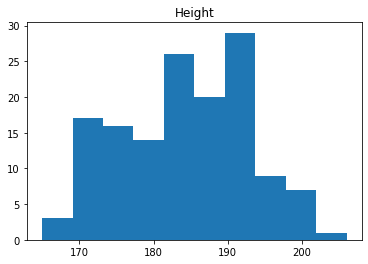

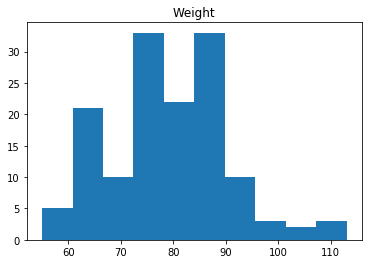

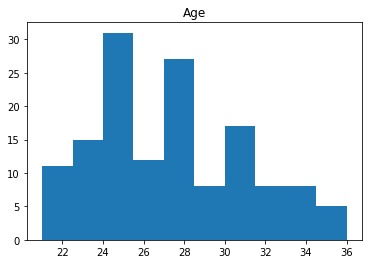

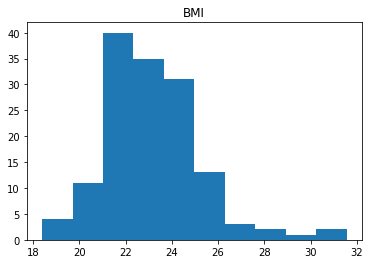

In [26]:
plt.hist(wnba["Height"])
plt.title("Height")
plt.show()

plt.hist(wnba["Weight"])
plt.title("Weight")
plt.show()

plt.hist(wnba["Age"])
plt.title("Age")
plt.show()

plt.hist(wnba["BMI"])
plt.title("BMI")
plt.show()

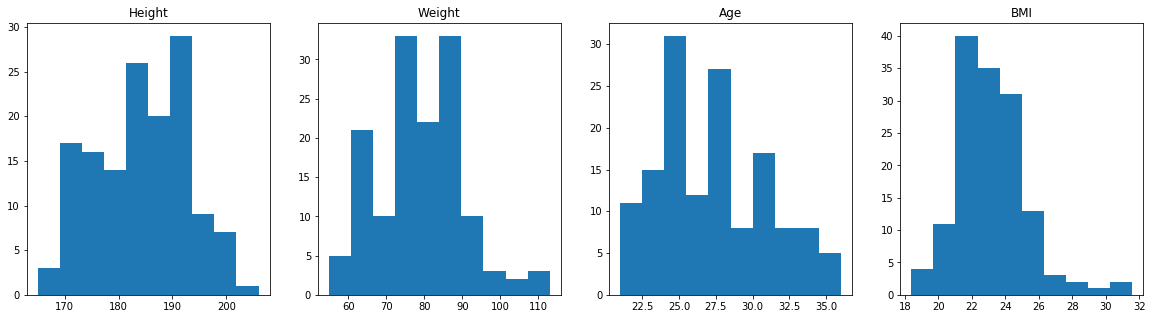

In [38]:
# better like this
fig, (Height,Weight,Age,BMI) = plt.subplots(nrows=1, ncols=4, figsize=(20,5))

Height.hist(wnba["Height"])
Height.set_title("Height")

Weight.hist(wnba["Weight"])
Weight.set_title("Weight")

Age.hist(wnba["Age"])
Age.set_title("Age")

BMI.hist(wnba["BMI"])
BMI.set_title("BMI")

plt.show()

**What conclusions do you think we can take from this plots?**

In [6]:
# Height: majority of players looks to be between 183-193. We see a few players that are also taller, probably play in a similar position 
# Weight: we clearly see some outliers that are well above the normal Weight (above 90). Most lay between 73-90. 
# Age: visible skew (most players tend to be younger, below 30)
# BMI: also a pretty visible skew, big majority tend to have a lower BMI

In addition to what the describe() method already told us we can see that the physical characteristics of the players (apart from the age) more or less follow a standard distribution, which is expected when looking at the distribution of values that arise from a lot of factors that are independent from each other as is the case for many physical quantities. 

The height distribution looks like a bimodal. This may be due to the fact that players in basketball fall under two main categories (please note that this is a very gross generalization): shorter and more agile, and taller and less agile. Therefore there are less "average" height players since they will neither be as agile as the shorter players nor have the same impact in the paint (that is, under the basket) as a taller player.

The age distribution is a bit skewed to the right which is expected since most professional players stop playing after their prime physical years come to an end.

We could do the same for the main game stats. They are points, assists, blocks, rebounds and steals. 

**Now plot the distribution of the columns `REB`, `AST`, `STL`, `PTS` and `BLK` the same way you did in the last cell.**

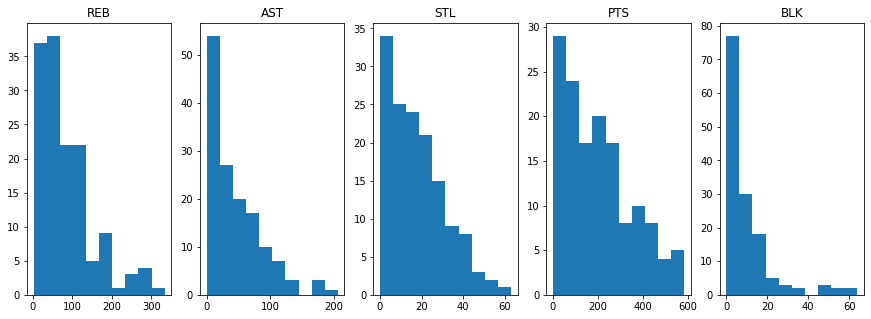

In [39]:
fig, (Rebounds,Assists,Steals,Points,Blocks) = plt.subplots(nrows=1, ncols=5, figsize=(15,5))

Rebounds.hist(wnba["REB"])
Rebounds.set_title("REB")

Assists.hist(wnba["AST"])
Assists.set_title("AST")

Steals.hist(wnba["STL"])
Steals.set_title("STL")

Points.hist(wnba["PTS"])
Points.set_title("PTS")

Blocks.hist(wnba["BLK"])
Blocks.set_title("BLK")

plt.show()

**What conclusions do you think we can take from this plots?**

In [ ]:
# all the dist are heavily skewed to the right. 
# Most players have low to avg stats and are the Star players that usually have higher than avg stats

As expected all of the above distribution are heavily skewed to the right, since most players will have very low to average stats while there will be a handful of star players whose stats peak above everyone else. It is also important to think about the fact that we are simply taking the stats as they are without considering the minutes played by each player. Even though skill plays a very important factor in determining this kind of stats we also have to consider that players that play more minutes will, on average, score more points (or blocks, assists, etc.).

**For the sake of it let's look at the same distributions by dividing those stats by the minutes played for each player in the dataset.** 

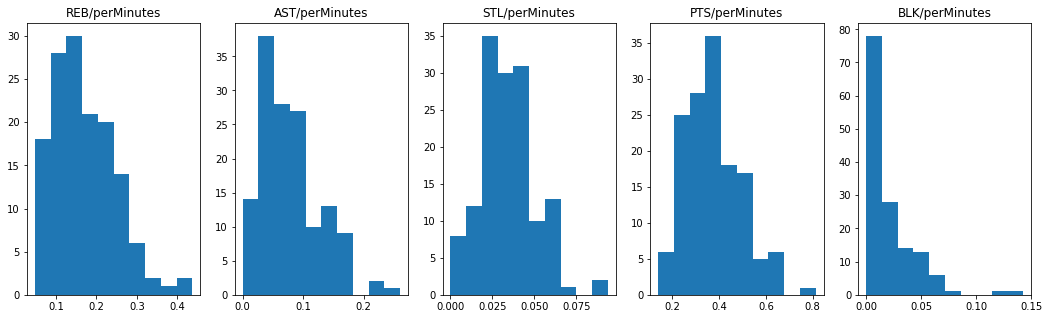

In [50]:
wnba["REB"] = wnba["REB"]/wnba["MIN"]
wnba["AST"] = wnba["AST"]/wnba["MIN"]
wnba["STL"] = wnba["STL"]/wnba["MIN"]
wnba["PTS"] = wnba["PTS"]/wnba["MIN"]
wnba["BLK"] = wnba["BLK"]/wnba["MIN"]



fig, (Rebounds,Assists,Steals,Points,Blocks) = plt.subplots(nrows=1, ncols=5, figsize=(18,5))

Rebounds.hist(wnba["REB"])
Rebounds.set_title("REB/perMinutes")

Assists.hist(wnba["AST"])
Assists.set_title("AST/perMinutes")

Steals.hist(wnba["STL"])
Steals.set_title("STL/perMinutes")

Points.hist(wnba["PTS"])
Points.set_title("PTS/perMinutes")

Blocks.hist(wnba["BLK"])
Blocks.set_title("BLK/perMinutes")

plt.show()

**What conclusions do you think we can take from this plots?**

In [ ]:
# Dist are still skewed to the right (PTS/perMinutes are more balanced now). 
# However, now we calculate these stats by the minutes that each player played, so we kinda "normalized" the players stats
# So, will be easier to see the outliers (for ex, players that played less time and score a lot of points or vice-versa)

### Summary

The main insights we obtained from this exploratory analysis are:
- Game-related stats have a very high range of values.
- There are some extremes in the weight and age columns.
- The physical characteristics of the players more or less follow a standard distribution.
- We need to take into account that our dataset contains data on both players that play the majority of games and also players that may spend almost the entirety of the season on the bench.

Now, it's time to try to put an end to your family's discussions. As seen on the README, the main discussions are:
- Your grandmother says that your sister couldn't play in a professional basketball league (not only the WNBA, but ANY professional basketball league) because she's too skinny and lacks muscle.
- Your sister says that most female professional players fail their free throws.
- Your brother-in-law heard on the TV that the average assists among NBA (male) and WNBA (female) players is 52 for the 2016-2017 season. He is convinced this average would be higher if we only considered the players from the WNBA.

**Do you think you have all the necessary data to answer these questions?**

In [51]:
# 1. Grandma (thats several player that are skinny and have a lower BMI/muscle)

wnba[(wnba["Weight"]<=wnba["Weight"].quantile(0.25)) & (wnba["BMI"]<=wnba["BMI"].quantile(0.25))]

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,0.161850,0.069364,0.017341,0.034682,12,0.537572,0,0
7,Allie Quigley,CHI,G,178,64,20.199470,US,"June 20, 1986",31,DePaul,8,26,847,166,319,52.0,70,150,46.7,40,46,87.0,9,83,0.108619,0.112161,0.023613,0.015348,59,0.521842,0,0
22,Briann January,IND,G,173,65,21.718066,US,"November 1, 1987",29,Arizona State,9,25,657,81,205,39.5,18,57,31.6,58,71,81.7,12,25,0.056317,0.149163,0.035008,0.006088,53,0.362253,0,0
26,Brittney Sykes,ATL,G,175,66,21.551020,US,"July 2, 1994",23,Rutgers,10,30,734,146,362,40.3,29,87,33.3,76,102,74.5,25,94,0.162125,0.080381,0.024523,0.023161,49,0.540872,1,0
38,Courtney Williams,CON,G,173,62,20.715694,US,"November 5, 1994",22,South Florida,1,29,755,168,338,49.7,8,30,26.7,31,36,86.1,38,84,0.161589,0.079470,0.019868,0.007947,39,0.496689,1,0
42,Danielle Robinson,PHO,G,175,57,18.612245,US,"October 5, 1989",27,Oklahoma,7,28,680,79,178,44.4,0,5,0.0,51,61,83.6,13,73,0.126471,0.155882,0.048529,0.005882,58,0.307353,0,0
61,Jasmine Thomas,CON,G,175,66,21.551020,US,"September 30, 1989",27,Duke,6,27,762,151,341,44.3,50,116,43.1,39,55,70.9,9,55,0.083990,0.154856,0.059055,0.005249,58,0.513123,1,0
62,Jazmon Gwathmey,IND,G,188,65,18.390675,PR,"January 24, 1993",24,James Madison,2,24,371,50,140,35.7,12,49,24.5,30,39,76.9,15,34,0.132075,0.045822,0.035040,0.051213,32,0.382749,0,0
66,Jewell Loyd,SEA,G,178,67,21.146320,US,"May 10, 1993",24,Notre Dame,3,29,715,116,245,47.3,8,21,38.1,28,37,75.7,50,139,0.264336,0.064336,0.025175,0.069930,57,0.374825,4,0
71,Kahleah Copper,CHI,G/F,185,70,20.452885,US,"August 28, 1994",22,Rutgers,1,29,475,62,163,38.0,12,32,37.5,49,65,75.4,10,33,0.090526,0.067368,0.027368,0.006316,48,0.389474,0,0


In [52]:
# 2. Sister (wrong by a lot, players actually score free throws 76% of the times)
wnba["FT%"].mean()

75.8288732394366

In [53]:
# 3. Brother-in-Law (wrong by a lot, since the avg assists lays on about 8%)
wnba["AST"].mean()

0.07915086084279188